<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Exploratory Data Analysis Lab**


Estimated time needed: **30** minutes


In this module you get to work with the cleaned dataset from the previous module.

In this assignment you will perform the task of exploratory data analysis.
You will find out the distribution of data, presence of outliers and also determine the correlation between different columns in the dataset.


## Objectives


In this lab you will perform the following:


-   Identify the distribution of data in the dataset.

-   Identify outliers in the dataset.

-   Remove outliers from the dataset.

-   Identify correlation between features in the dataset.


* * *


## Hands on Lab


Import the pandas module.


In [1]:
import pandas as pd

Load the dataset into a dataframe.


In [2]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")

## Distribution


### Determine how the data is distributed


The column `ConvertedComp` contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01.

This assumes 12 working months and 50 working weeks.


Plot the distribution curve for the column `ConvertedComp`.


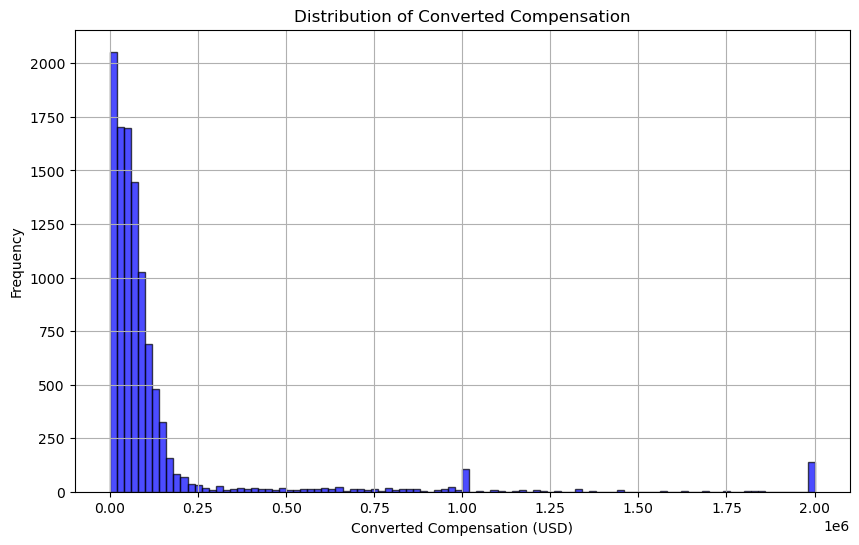

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")

df = df.dropna(subset=['ConvertedComp'])

plt.figure(figsize=(10, 6))
plt.hist(df['ConvertedComp'], bins=100, color='blue', alpha=0.7, edgecolor='k')
plt.title('Distribution of Converted Compensation')
plt.xlabel('Converted Compensation (USD)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


Plot the histogram for the column `ConvertedComp`.


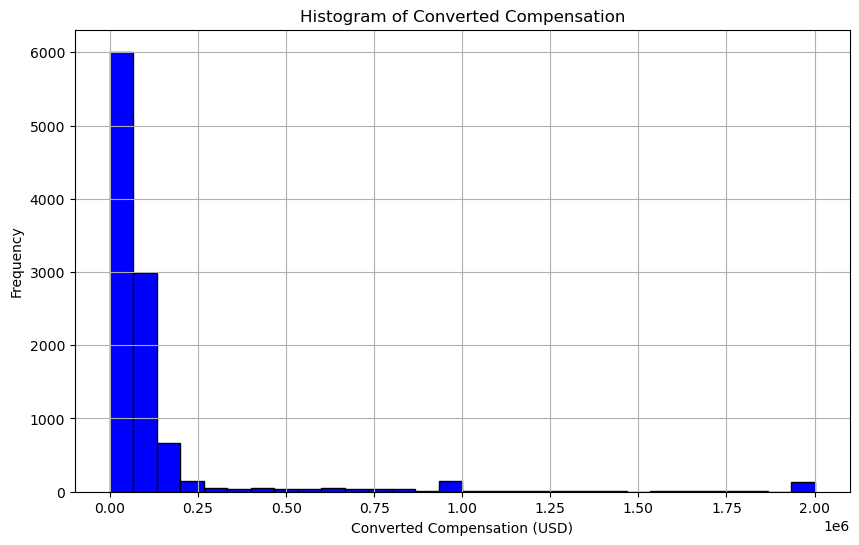

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")

df = df.dropna(subset=['ConvertedComp'])

plt.figure(figsize=(10, 6))
plt.hist(df['ConvertedComp'], bins=30, color='blue', edgecolor='k')
plt.title('Histogram of Converted Compensation')
plt.xlabel('Converted Compensation (USD)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


What is the median of the column `ConvertedComp`?


In [8]:
median_converted_comp = df['ConvertedComp'].median()

print("Median Converted Compensation:", median_converted_comp)



Median Converted Compensation: 57745.0


How many responders identified themselves only as a **Man**?


In [12]:
import pandas as pd

df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")

man_identified = df[df['Gender'] == 'Man']
num_man_identified = man_identified.shape[0]

print("Number of Responders Identifying as 'Man' Only:", num_man_identified)


Number of Responders Identifying as 'Man' Only: 10480


Find out the  median ConvertedComp of responders identified themselves only as a **Woman**?


In [15]:
import pandas as pd

df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")

woman_identified = df[df['Gender'] == 'Woman']
median_woman_compensation = woman_identified['ConvertedComp'].median()

print("Median Converted Compensation for Responders Identifying as 'Woman' Only:", median_woman_compensation)


Median Converted Compensation for Responders Identifying as 'Woman' Only: 57708.0


Give the five number summary for the column `Age`?


**Double click here for hint**.

<!--
min,q1,median,q3,max of a column are its five number summary.
-->


In [16]:
age_summary = df['Age'].describe(percentiles=[.25, .5, .75])

print("Five-Number Summary for 'Age' column:")
print(age_summary[['min', '25%', '50%', '75%', 'max']])


Five-Number Summary for 'Age' column:
min    16.0
25%    25.0
50%    29.0
75%    35.0
max    99.0
Name: Age, dtype: float64


Plot a histogram of the column `Age`.


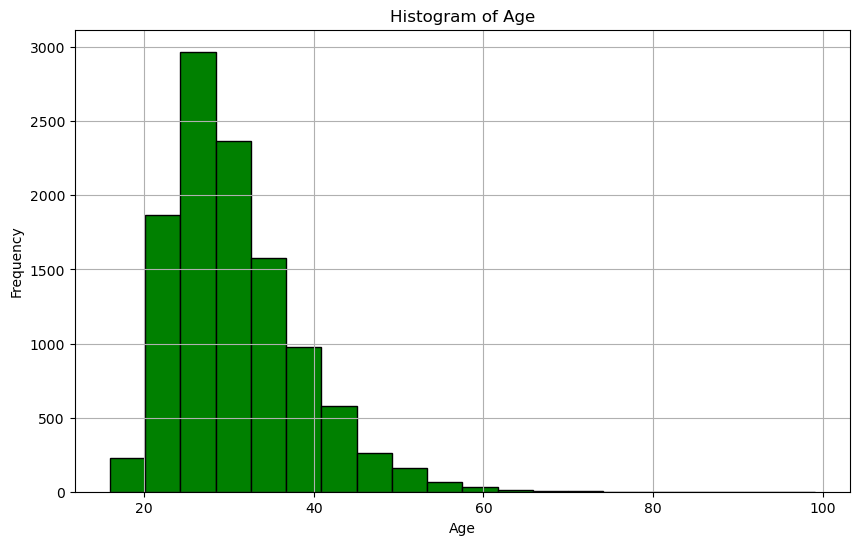

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")

df = df.dropna(subset=['Age'])

plt.figure(figsize=(10, 6))
plt.hist(df['Age'], bins=20, color='green', edgecolor='k')
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()



## Outliers


### Finding outliers


Find out if outliers exist in the column `ConvertedComp` using a box plot?


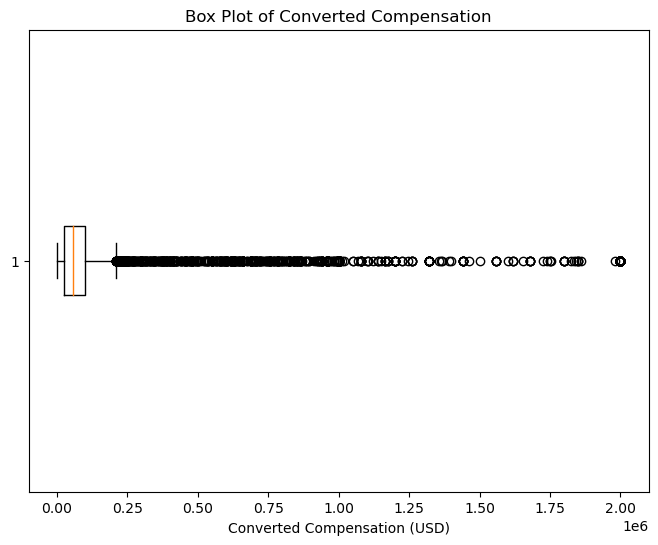

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")

df = df.dropna(subset=['ConvertedComp'])

plt.figure(figsize=(8, 6))
plt.boxplot(df['ConvertedComp'], vert=False)
plt.title('Box Plot of Converted Compensation')
plt.xlabel('Converted Compensation (USD)')
plt.show()


Find out the Inter Quartile Range for the column `ConvertedComp`.


In [20]:
import pandas as pd
import numpy as np

df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")

df = df.dropna(subset=['ConvertedComp'])

Q3 = np.percentile(df['ConvertedComp'], 75)
Q1 = np.percentile(df['ConvertedComp'], 25)

IQR = Q3 - Q1

print("Interquartile Range (IQR) for 'ConvertedComp':", IQR)


Interquartile Range (IQR) for 'ConvertedComp': 73132.0


Find out the upper and lower bounds.


In [22]:
import pandas as pd
import numpy as np

df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")

df = df.dropna(subset=['ConvertedComp'])

Q3 = np.percentile(df['ConvertedComp'], 75)
Q1 = np.percentile(df['ConvertedComp'], 25)

IQR = Q3 - Q1

upper_bound = Q3 + 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR

print("Upper Bound for Outliers:", upper_bound)
print("Lower Bound for Outliers:", lower_bound)


Upper Bound for Outliers: 209698.0
Lower Bound for Outliers: -82830.0


Identify how many outliers are there in the `ConvertedComp` column.


In [24]:
import pandas as pd
import numpy as np

df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")

df = df.dropna(subset=['ConvertedComp'])

Q3 = np.percentile(df['ConvertedComp'], 75)
Q1 = np.percentile(df['ConvertedComp'], 25)

IQR = Q3 - Q1

upper_bound = Q3 + 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR

outliers = df[(df['ConvertedComp'] > upper_bound) | (df['ConvertedComp'] < lower_bound)]
num_outliers = outliers.shape[0]

print("Number of Outliers in 'ConvertedComp' column:", num_outliers)


Number of Outliers in 'ConvertedComp' column: 879


Create a new dataframe by removing the outliers from the `ConvertedComp` column.


In [26]:
import pandas as pd
import numpy as np

df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")

df = df.dropna(subset=['ConvertedComp'])

Q3 = np.percentile(df['ConvertedComp'], 75)
Q1 = np.percentile(df['ConvertedComp'], 25)

IQR = Q3 - Q1

upper_bound = Q3 + 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR

df_no_outliers = df[(df['ConvertedComp'] >= lower_bound) & (df['ConvertedComp'] <= upper_bound)]

print(df_no_outliers)



       Respondent                      MainBranch Hobbyist  \
0               4  I am a developer by profession       No   
1               9  I am a developer by profession      Yes   
2              13  I am a developer by profession      Yes   
4              17  I am a developer by profession      Yes   
5              19  I am a developer by profession      Yes   
...           ...                             ...      ...   
11392       25134  I am a developer by profession      Yes   
11393       25136  I am a developer by profession      Yes   
11394       25137  I am a developer by profession      Yes   
11395       25138  I am a developer by profession      Yes   
11396       25141  I am a developer by profession      Yes   

                                             OpenSourcer  \
0                                                  Never   
1                             Once a month or more often   
2      Less than once a month but more than once per ...   
4      Less tha

## Correlation


### Finding correlation


Find the correlation between `Age` and all other numerical columns.


In [28]:
import pandas as pd

df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")

correlation_matrix = df.corr(method='pearson')  

age_correlation = correlation_matrix['Age']

print(age_correlation)



Respondent       0.004041
CompTotal        0.006970
ConvertedComp    0.105386
WorkWeekHrs      0.036518
CodeRevHrs      -0.020469
Age              1.000000
Name: Age, dtype: float64


## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
